In [1]:
# Import all necessary libraries
import pandas as pd #for analyzing data
import numpy as np #mathmetical operation
from sklearn.impute import SimpleImputer # for fill na
import matplotlib.pyplot as plt #visualization and graphical plotting
import seaborn as sns #for plotting heatmap

from sklearn.model_selection import train_test_split # split data into train data set and test data set

#data scalling and preprocessing
from sklearn.preprocessing import StandardScaler # for standarisation data


#modeling
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression #logistic regression model
from sklearn.svm import SVC #Support vector mechine
from sklearn.neighbors import KNeighborsClassifier #K_neighbors classifier
from sklearn.naive_bayes import GaussianNB #Gaussian Naive_bayes

#performace estimation
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

#confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from sklearn.metrics import roc_auc_score# AUC score

In [2]:
df=pd.read_csv(r"C:\Users\Jpamb\Desktop\AIQ1\aml_train.csv") #read the dataset

In [3]:
#Let's see some of the sample entries of dataset
df.head()

,TxnID,token,TransactionType,amount,SenderID,PrevBalanceSender,CurrentBalanceSender,ReceiverID,PrevBalanceReceiver,CurrentBalanceReceiver,time,Sender Location,Receiver Location,IsSuspicious,Unnamed: 14
0,31977534500,578,Money Order,152372.18,UR37274825203,152372.18,0.00,UR36830343138,0.00,0.00,10-06-2019 02:23,Danville - Pennsylvania,Lumberton - Mississippi,1,15
1,56227886005,393,Money Order,1539880.97,UR34091506450,530514.00,0.00,UR15881981982,744923.33,2284804.29,02-06-2019 09:19,North Java - New York,Falmouth - Kentucky,0,26
2,15960169749,258,Cash Deposit,71514.14,UR25461871663,28044.00,99558.14,UR33481636683,81922.25,10408.12,27-05-2019 18:19,Petersburg - Illinois,Ledbetter - Texas,0,51
3,42677949513,570,Money Order,3712.11,UR36082311467,3712.11,0.00,UR30655051211,NaN,0.00,09-06-2019 18:19,Danville - Pennsylvania,Lumberton - Mississippi,1,13
4,23358983694,43,Cash Deposit,65913.36,UR34002111532,124336.14,190249.49,UR41907390101,336237.28,270323.92,18-05-2019 19:02,Trenton - Michigan,Lake Hubert - Minnesota,0,99


In [4]:
df.shape

(4000, 15)

In [5]:
df.columns

Index(['TxnID', 'token', 'TransactionType', 'amount', 'SenderID',
       'PrevBalanceSender', 'CurrentBalanceSender', 'ReceiverID',
       'PrevBalanceReceiver', 'CurrentBalanceReceiver', 'time',
       'Sender Location', 'Receiver Location', 'IsSuspicious', 'Unnamed: 14'],
      dtype='object')

In [6]:
# The info() function is used to show range of index, column type, data type, memory usage
# Here, info() is used to know the data type and column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TxnID                   4000 non-null   int64  
 1   token                   4000 non-null   int64  
 2   TransactionType         4000 non-null   object 
 3   amount                  4000 non-null   float64
 4   SenderID                4000 non-null   object 
 5   PrevBalanceSender       4000 non-null   float64
 6   CurrentBalanceSender    4000 non-null   float64
 7   ReceiverID              4000 non-null   object 
 8   PrevBalanceReceiver     3757 non-null   float64
 9   CurrentBalanceReceiver  4000 non-null   float64
 10  time                    4000 non-null   object 
 11  Sender Location         3760 non-null   object 
 12  Receiver Location       3776 non-null   object 
 13  IsSuspicious            4000 non-null   int64  
 14  Unnamed: 14             4000 non-null   

In [7]:
# Used drop() function for removing unnecessary features
train_data = df.drop(['Unnamed: 14'], axis = 'columns', inplace = False)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TxnID                   4000 non-null   int64  
 1   token                   4000 non-null   int64  
 2   TransactionType         4000 non-null   object 
 3   amount                  4000 non-null   float64
 4   SenderID                4000 non-null   object 
 5   PrevBalanceSender       4000 non-null   float64
 6   CurrentBalanceSender    4000 non-null   float64
 7   ReceiverID              4000 non-null   object 
 8   PrevBalanceReceiver     3757 non-null   float64
 9   CurrentBalanceReceiver  4000 non-null   float64
 10  time                    4000 non-null   object 
 11  Sender Location         3760 non-null   object 
 12  Receiver Location       3776 non-null   object 
 13  IsSuspicious            4000 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memor

In [9]:
# Showing number of null values in every column
train_data.isnull().sum()

TxnID                       0
token                       0
TransactionType             0
amount                      0
SenderID                    0
PrevBalanceSender           0
CurrentBalanceSender        0
ReceiverID                  0
PrevBalanceReceiver       243
CurrentBalanceReceiver      0
time                        0
Sender Location           240
Receiver Location         224
IsSuspicious                0
dtype: int64

In [10]:
# Showing duplicate values 
train_data.duplicated().sum()

0

In [11]:
# Used simpleImputer for imputing null values and missing data which return most frequent data and replace them.
from sklearn.impute import SimpleImputer

impt = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
train_data = impt.fit_transform(train_data)


In [12]:
train_data = pd.DataFrame(train_data, columns=['TxnID','token','TransactionType','amount','SenderID','PrevBalanceSender','CurrentBalanceSender','ReceiverID','PrevBalanceReceiver','CurrentBalanceReceiver','time','Sender Location','Receiver Location','IsSuspicious'])

In [13]:
train_data.head()

,TxnID,token,TransactionType,amount,SenderID,PrevBalanceSender,CurrentBalanceSender,ReceiverID,PrevBalanceReceiver,CurrentBalanceReceiver,time,Sender Location,Receiver Location,IsSuspicious
0,31977534500,578,Money Order,152372.18,UR37274825203,152372.18,0.0,UR36830343138,0.0,0.0,10-06-2019 02:23,Danville - Pennsylvania,Lumberton - Mississippi,1
1,56227886005,393,Money Order,1539880.97,UR34091506450,530514.0,0.0,UR15881981982,744923.33,2284804.29,02-06-2019 09:19,North Java - New York,Falmouth - Kentucky,0
2,15960169749,258,Cash Deposit,71514.14,UR25461871663,28044.0,99558.14,UR33481636683,81922.25,10408.12,27-05-2019 18:19,Petersburg - Illinois,Ledbetter - Texas,0
3,42677949513,570,Money Order,3712.11,UR36082311467,3712.11,0.0,UR30655051211,0.0,0.0,09-06-2019 18:19,Danville - Pennsylvania,Lumberton - Mississippi,1
4,23358983694,43,Cash Deposit,65913.36,UR34002111532,124336.14,190249.49,UR41907390101,336237.28,270323.92,18-05-2019 19:02,Trenton - Michigan,Lake Hubert - Minnesota,0


# **3. Data Exploration (Historical analysis report)**

In [14]:
train_data.IsSuspicious.value_counts()

0    3546
1     454
Name: IsSuspicious, dtype: int64

<AxesSubplot:xlabel='TransactionType'>

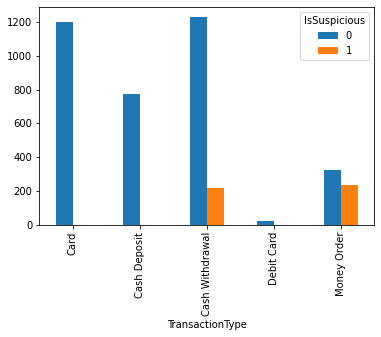

In [15]:
pd.crosstab(train_data['TransactionType'],train_data['IsSuspicious']).plot.bar()

In [16]:
pd.crosstab(train_data['TransactionType'],train_data['IsSuspicious'], normalize='index')

IsSuspicious,0,1
TransactionType,,
Card,1.000000,0.000000
Cash Deposit,1.000000,0.000000
Cash Withdrawal,0.849135,0.150865
Debit Card,1.000000,0.000000
Money Order,0.576302,0.423698


# **4. Feature Engineering**

In [17]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['amount',
                    
                    'PrevBalanceSender',
                    'CurrentBalanceSender',
                    
                    'PrevBalanceReceiver',
                    'CurrentBalanceReceiver']

train_data[columns_to_scale] = standardScaler.fit_transform(train_data[columns_to_scale])

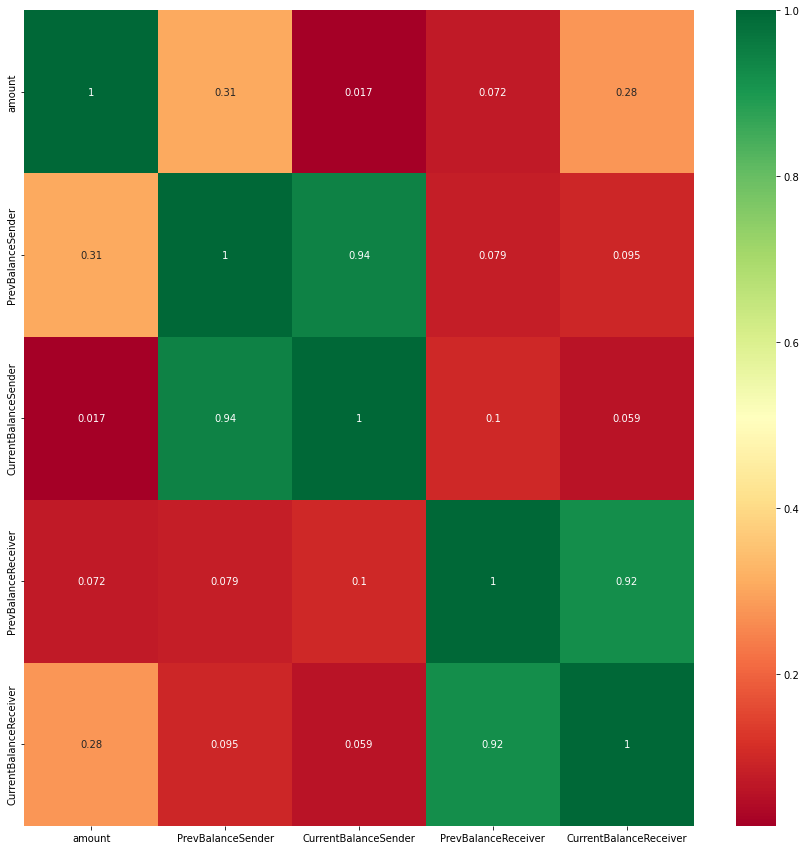

In [18]:
#get correlations of each features in dataset
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
train_data.columns

Index(['TxnID', 'token', 'TransactionType', 'amount', 'SenderID',
       'PrevBalanceSender', 'CurrentBalanceSender', 'ReceiverID',
       'PrevBalanceReceiver', 'CurrentBalanceReceiver', 'time',
       'Sender Location', 'Receiver Location', 'IsSuspicious'],
      dtype='object')

In [20]:
# Flittering out the unnecessary columns & store the new dataset which is lbw_data_sub
train_data_sub = train_data[[
                            'amount',
                    
                    'PrevBalanceSender',
                    'CurrentBalanceSender',
                    
                    'PrevBalanceReceiver',
                    'CurrentBalanceReceiver',
                            'IsSuspicious']]
train_data_sub.head()

,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver,IsSuspicious
0,-0.168114,-0.254294,-0.269916,-0.386344,-0.442768,1
1,1.239949,-0.119149,-0.269916,-0.067106,0.435687,0
2,-0.250170,-0.298727,-0.232795,-0.351236,-0.438766,0
3,-0.318976,-0.307423,-0.269916,-0.386344,-0.442768,1
4,-0.255854,-0.264313,-0.198980,-0.242249,-0.338834,0


In [21]:
# segregating dataset into features i.e., X and target variables i.e., y
X = train_data_sub.drop(['IsSuspicious'],axis=1)
y = train_data_sub['IsSuspicious']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25,shuffle=True, random_state=5)

In [23]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
0    2660
1     340
Name: IsSuspicious, dtype: int64
Distribution of traget variable in test set
0    886
1    114
Name: IsSuspicious, dtype: int64


# **4. Model building**

## **Classification model building**

---



In [24]:
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

**Logistic regression**

In [25]:
Logistic=LogisticRegression(C=0.03, solver='liblinear')
Logistic.fit(X_train,y_train)
y_pred_logi = Logistic.predict(X_test)
X_train.shape

(3000, 5)

**Random Forest Classifier (criterion = 'entropy')**

In [26]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

**K nearest neighbour (n=9)**

In [27]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

**Support Vector Classifier (kernel='linear')**

In [28]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

**decision Tree Classifier (CART)**

In [29]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

**gradient boosting classifier**

In [30]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

# **5. Model Evaluation**

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,97.7,95.283019,84.87395,99.432463,89.777778,92.153206,79.439586,88.674828


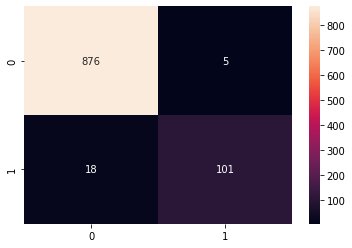

In [31]:
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True,fmt="d")

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)*100
loss_log = log_loss(y_test, y_pred_rfe)*100
acc= accuracy_score(y_test, y_pred_rfe)*100
roc=roc_auc_score(y_test, y_pred_rfe)*100
prec = precision_score(y_test, y_pred_rfe)*100
rec = recall_score(y_test, y_pred_rfe)*100
f1 = f1_score(y_test, y_pred_rfe)*100
mathew = matthews_corrcoef(y_test, y_pred_rfe)*100
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [32]:
data = {        'logistic': y_pred_logi,
                'KNN': y_pred_knn,  
                'SVC': y_pred_svc,  
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)*100
    loss_log = log_loss(y_test, models[column])*100
    acc= accuracy_score(y_test, models[column])*100
    roc=roc_auc_score(y_test, models[column])*100
    prec = precision_score(y_test, models[column])*100
    rec = recall_score(y_test, models[column])*100
    f1 = f1_score(y_test, models[column])*100
    mathew = matthews_corrcoef(y_test, models[column])*100
    
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

C:\Users\Jpamb\AppData\Local\Temp\ipykernel_6436\1618861527.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
C:\Users\Jpamb\AppData\Local\Temp\ipykernel_6436\1618861527.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
C:\Users\Jpamb\AppData\Local\Temp\ipykernel_6436\1618861527.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
C:\Users\Jpamb\AppData\Local\Temp\ipykernel_6436\1618861527.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,97.7,95.283019,84.873950,99.432463,89.777778,92.153206,79.439586,88.674828
1,logistic,90.8,90.909091,25.210084,99.659478,39.473684,62.434781,317.756983,45.077452
2,KNN,96.1,92.553191,73.109244,99.205448,81.690141,86.157346,134.701788,80.234278
3,SVC,94.0,100.000000,49.579832,100.000000,66.292135,74.789916,207.232658,68.131142
4,CART,97.5,91.964286,86.554622,98.978434,89.177489,92.766528,86.347661,87.817269
5,GBM,97.3,96.938776,79.831933,99.659478,87.557604,89.745705,93.254936,86.569584


In [33]:
print(CM[0][0])

878
